In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 数据总体了解

### 读取数据，了解数据集信息

In [40]:
data_test = pd.read_csv('../finance_dataset/testA.csv')

In [41]:
data_test.shape

(200000, 46)

In [42]:
data_test.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [2]:
data_train = pd.read_csv('../finance_dataset/train.csv')

In [3]:
data_train.shape

(800000, 47)

In [4]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
id                    800000 non-null int64
loanAmnt              800000 non-null float64
term                  800000 non-null int64
interestRate          800000 non-null float64
installment           800000 non-null float64
grade                 800000 non-null object
subGrade              800000 non-null object
employmentTitle       799999 non-null float64
employmentLength      753201 non-null object
homeOwnership         800000 non-null int64
annualIncome          800000 non-null float64
verificationStatus    800000 non-null int64
issueDate             800000 non-null object
isDefault             800000 non-null int64
purpose               800000 non-null int64
postCode              799999 non-null float64
regionCode            800000 non-null int64
dti                   799761 non-null float64
delinquency_2years    800000 non-null float64
ficoRangeLow          800000 non-

综上可知：
1. n0-n14都有缺失值
2. employmentTitle,employmentLength postCode ,dti ,pubRecBankruptcies, revolUtil,title.有缺失值             

In [6]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


1. term最大值为5，四分位数都是3
2. homeOwnership最小值为0，中位数为1，最大值为5
3. verificationStatus坑你只有3个值
4. isDefault，可能只有2个值

### 缺失值和唯一值

### 每列包含的缺失值情况

In [7]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

### 查看每列中唯一值情况

In [8]:
data_train.nunique()

id                    800000
loanAmnt                1540
term                       2
interestRate             641
installment            72360
grade                      7
subGrade                  35
employmentTitle       248683
employmentLength          11
homeOwnership              6
annualIncome           44926
verificationStatus         3
issueDate                139
isDefault                  2
purpose                   14
postCode                 932
regionCode                51
dti                     6321
delinquency_2years        30
ficoRangeLow              39
ficoRangeHigh             39
openAcc                   75
pubRec                    32
pubRecBankruptcies        11
revolBal               71116
revolUtil               1286
totalAcc                 134
initialListStatus          2
applicationType            2
earliesCreditLine        720
title                  39644
policyCode                 1
n0                        39
n1                        33
n2            

## 深入数据-查看数据类型

In [9]:
object_data=data_train.select_dtypes(include='object')

In [10]:
object_data.columns

Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
       'earliesCreditLine'],
      dtype='object')

In [11]:
num_data = data_train.select_dtypes(exclude='object')

In [12]:
num_data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment',
       'employmentTitle', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode',
       'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0',
       'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14'],
      dtype='object')

In [13]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 42 columns):
id                    800000 non-null int64
loanAmnt              800000 non-null float64
term                  800000 non-null int64
interestRate          800000 non-null float64
installment           800000 non-null float64
employmentTitle       799999 non-null float64
homeOwnership         800000 non-null int64
annualIncome          800000 non-null float64
verificationStatus    800000 non-null int64
isDefault             800000 non-null int64
purpose               800000 non-null int64
postCode              799999 non-null float64
regionCode            800000 non-null int64
dti                   799761 non-null float64
delinquency_2years    800000 non-null float64
ficoRangeLow          800000 non-null float64
ficoRangeHigh         800000 non-null float64
openAcc               800000 non-null float64
pubRec                800000 non-null float64
pubRecBankruptcies    799595 

### 数值型变量可能存在数值类别型变量

In [14]:
# num_data
def get_num_obj_data(data,feas):
    num_obj_data_columns = []
    for fea in feas:
        num = data[fea].nunique()

        if num<20:
            num_obj_data_columns.append(fea)
    return num_obj_data_columns
num_obj_col = get_num_obj_data(data_train,num_data.columns)

In [15]:
num_nobj_col = [col for col in num_data.columns if col not in num_obj_col]

In [16]:
num_nobj_col

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [17]:
num_obj_col

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'purpose',
 'pubRecBankruptcies',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

## 数据间相关关系

In [21]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=num_nobj_col)

In [31]:
f[:5]

,variable,value
0,id,0.0
1,id,1.0
2,id,2.0
3,id,3.0
4,id,4.0


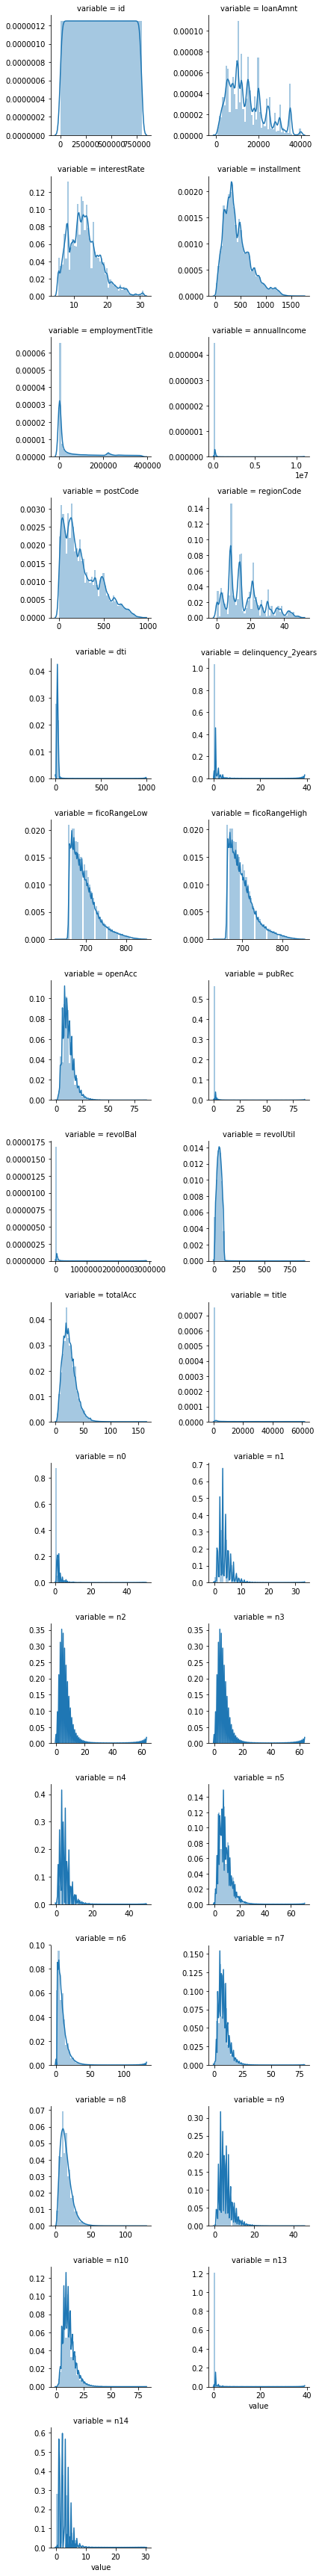

In [33]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Text(0,0.5,'Probability')

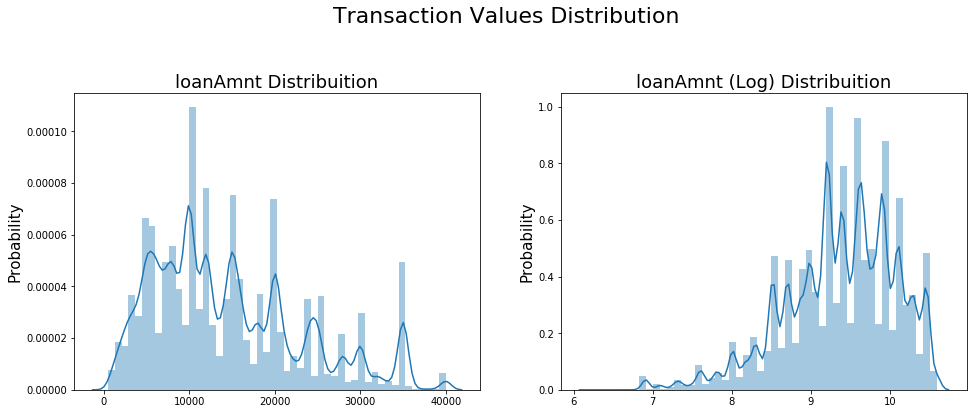

In [38]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

## 生成报告

In [44]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pfr = pandas_profiling.ProfileReport(data_train)
pfr.to_file("./example.html")